In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

#%reload_ext autoreload
#%autoreload 2
#%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = Path('../data/mnist')

In [4]:
path.ls()

[PosixPath('../data/mnist/valid'),
 PosixPath('../data/mnist/trainingSet'),
 PosixPath('../data/mnist/models'),
 PosixPath('../data/mnist/train'),
 PosixPath('../data/mnist/testSet'),
 PosixPath('../data/mnist/testSample')]

# 数据集处理

In [5]:
# (path/'trainingSample').rename(path/'valid')

In [6]:
# import os
# os.mkdir(path/'train')
# trainingSet = path/'trainingSet'
# for child in trainingSet.iterdir():
#     if child.is_dir():
#         os.mkdir(path/'train'/child.name)

In [7]:
# import random
# import shutil
# file_names = list((path/'trainingSet').glob('*/*.jpg'))
# random.shuffle(file_names)
# for file in file_names[:2000]:
#     print(f"copy form {file} to {path/'train'/file.parent.name/file.name}")
#     shutil.copyfile(file, path/'train'/file.parent.name/file.name)

In [8]:
tfms = get_transforms(do_flip=False)

In [9]:
data = (ImageList.from_folder(path)
       .split_by_folder(train='train', valid='valid')
       .label_from_folder()
       .transform(tfms)
       .databunch(bs=16, num_workers=0))

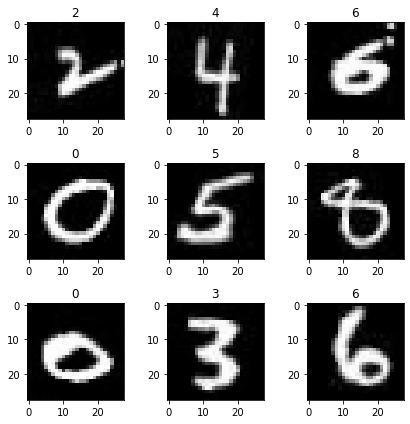

In [10]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [11]:
data

ImageDataBunch;

Train: LabelList (2000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,9,9,9,9
Path: ../data/mnist;

Valid: LabelList (600 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
9,9,9,9,9
Path: ../data/mnist;

Test: None

In [12]:
learner = cnn_learner(data, models.resnet18, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


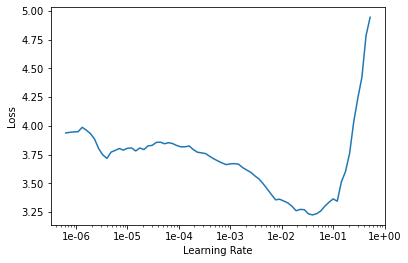

In [13]:
lr_find(learner)
learner.recorder.plot()

In [15]:
learner.fit_one_cycle(8,2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.660320,1.346635,0.368333,00:22
1,1.468111,1.043392,0.285000,00:23
2,1.151624,0.689649,0.215000,00:22
3,0.940920,0.510755,0.165000,00:22
4,0.766930,0.373350,0.123333,00:22
5,0.672057,0.351892,0.111667,00:22
6,0.571160,0.328088,0.100000,00:22
7,0.513604,0.326676,0.096667,00:22


In [33]:
learner.predict(learner.data.train_ds[0][0])[2].argmax()

tensor(9)

In [32]:
type(learner.data.valid_ds[138][0])

fastai.vision.image.Image

In [37]:
learner.predict(learner.data.valid_ds[0][0])[2].argmax()

tensor(3)

In [39]:
learner.data.valid_ds[1][0]